## Машинное обучение, ФКН ВШЭ

## Практическое задание 2

### Общая информация
Дата выдачи: 3 ноября 2017

Мягкий дедлайн: 23:59MSK 19 ноября (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 26 ноября.

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии
- реализуете логистическую регрессию и её обучение градиентным спуском
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-02-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-02-IvanovIvan.ipynb). Приложите модули с кодом logreg.py и заархивируйте оба файла вместе в zip формат. Имя архива должно быть homework-practice-02-Username.zip)

Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+151@gmail.com для студентов группы БПМИ-151).


Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

** Оценка:** 7

In [193]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [194]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [211]:
from __future__ import print_function
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [196]:
%matplotlib inline

In [202]:
def regression_model(x, y, a, mode):
    if mode == 'ridge':
        m = Ridge(alpha=a)
    else:
        m = Lasso(alpha=a)
    
    m.fit(x, y)
    coefs = [m.intercept_]
    coefs.extend(m.coef_)
    nul_coefs = [x for x in coefs if abs(x)<5]
    
    pred_train = m.predict(x)
    err_train = mean_squared_error(y, pred_train)
    return len(nul_coefs), err_train

In [203]:
num1, _ = regression_model(X_train, y_train, 1.0, 'ridge')
num2, _ = regression_model(X_train, y_train, 1.0, 'lasso')
print('Number of small coefficients for Ridge regression: ', num1)
print('Number of small coefficients for Lasso regression: ', num2)

Number of small coefficients for Ridge regression:  1
Number of small coefficients for Lasso regression:  7


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


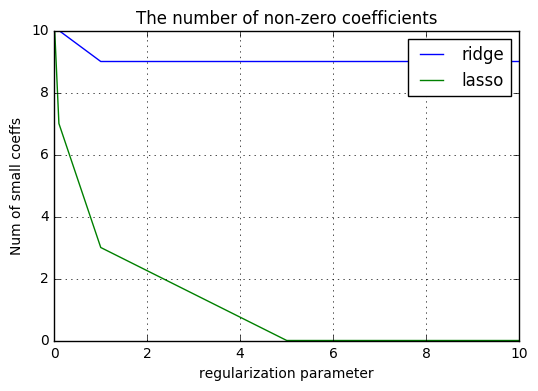

In [225]:
# a = np.logspace(0.001, 1000, num=100)
a = [1e-15, 1e-12, 1e-10, 1e-8, 1e-7, 1e-6, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10]
num_nul_ridge = [len(X_train[0])-regression_model(X_train, y_train, a[i], 'ridge')[0] for i in range(len(a))]
num_nul_lasso = [len(X_train[0])-regression_model(X_train, y_train, a[i], 'lasso')[0] for i in range(len(a))]
num_feat = [len(X_train[0]) for i in range(len(a))]
plt.figure()
plt.plot(a, num_nul_ridge, label='ridge')
plt.plot(a, num_nul_lasso, label='lasso')
plt.title("The number of non-zero coefficients")
plt.xlabel("regularization parameter")
plt.ylabel("Num of small coeffs")
plt.grid()
plt.legend()
plt.show()

Видим, что число нулевых коэффициентов у Lasso регуляризации больше. 

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [226]:
m = Ridge(normalize = True, random_state=241)
m.fit(X_train, y_train)
preds = m.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)


RMSE:  57.2638587739
MAE:  48.8978404101
R2:  0.382543201375


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [227]:
rr = Ridge(normalize = True, random_state=241)
a = [1e-15, 1e-12, 1e-10, 1e-8, 1e-7, 1e-6, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10]
param_grid_ridge = {'alpha': a}
gsearch_ridge = GridSearchCV(estimator = rr, param_grid = param_grid_ridge, 
                             scoring='neg_mean_squared_error',iid=False, cv=5)
gsearch_ridge.fit(X_train,y_train)
best_a = gsearch_ridge.best_params_['alpha']

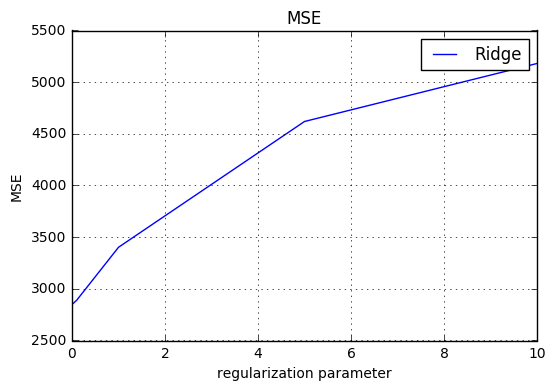

In [228]:
mse = [regression_model(X_train, y_train, a[i], 'ridge')[1] for i in range(len(a))]
plt.plot(a, mse, label="Ridge")
plt.title("MSE")
plt.xlabel("regularization parameter")
plt.ylabel("MSE")
plt.grid()
plt.legend()
plt.show()

In [229]:
gsearch_ridge.grid_scores_, gsearch_ridge.best_params_, gsearch_ridge.best_score_

//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -3018.38111, std: 341.77575, params: {'alpha': 1e-15},
  mean: -3018.38111, std: 341.77575, params: {'alpha': 1e-12},
  mean: -3018.38111, std: 341.77575, params: {'alpha': 1e-10},
  mean: -3018.38108, std: 341.77577, params: {'alpha': 1e-08},
  mean: -3018.38081, std: 341.77602, params: {'alpha': 1e-07},
  mean: -3018.37817, std: 341.77844, params: {'alpha': 1e-06},
  mean: -3018.09673, std: 342.04205, params: {'alpha': 0.0001},
  mean: -3016.24957, std: 344.20159, params: {'alpha': 0.001},
  mean: -3016.14769, std: 353.79962, params: {'alpha': 0.01},
  mean: -3020.21407, std: 360.71370, params: {'alpha': 0.1},
  mean: -3315.31074, std: 402.99539, params: {'alpha': 1},
  mean: -4345.36037, std: 465.14849, params: {'alpha': 5},
  mean: -4932.33283, std: 508.47434, params: {'alpha': 10}],
 {'alpha': 0.01},
 -3016.1476881609583)

In [230]:
m = Ridge(alpha=best_a,normalize = True, random_state=241)
m.fit(X_train, y_train)
preds = m.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

RMSE:  55.7539061247
MAE:  47.0440108702
R2:  0.414676506618


После выбора коэффициента регуляризации качество модели улучшилось, но не значительно.

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

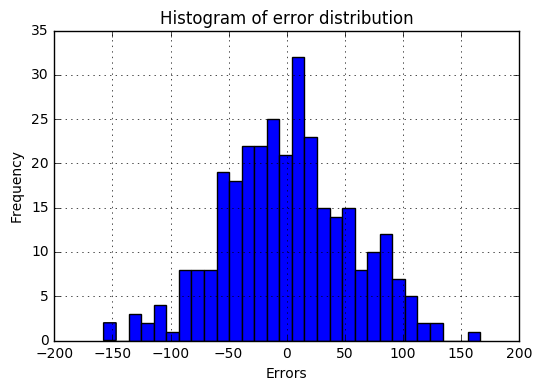

In [233]:
r = Ridge(alpha=best_a, normalize = True, random_state=241)
preds = cross_val_predict(r, X_train, y_train, cv=5)
err = y_train-preds
plt.hist(err, bins=30)
plt.grid()
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Histogram of error distribution')
plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [237]:
no_outliers = np.where(abs(err)<50)[0]
X_new = pd.DataFrame(X_train).iloc[no_outliers]
y_new = pd.DataFrame(y_train).iloc[no_outliers]

r = Ridge(alpha=best_a, normalize = True, random_state=241)
r.fit(X_new, y_new)
preds = r.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

RMSE:  55.4597089776
MAE:  46.7854721725
R2:  0.420837372747


Качество улучшилось незначительно.

## Часть 2. Логистическая регрессия

В этой части мы будем реализовывать один из самых простых бинарных классификаторов — логистическую регрессию и её обучение с помощью обычного (полного) и стохастического градиентных спусков.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). В случае стохастического градиентного спуска $\nabla_w Q(w, X) \approx \nabla_w q_{i_k} (w)$, где $i_k$ — случайно выбранный номер слагаемого из функционала (регуляризатор можно внести в сумму, предварительно умножив и разделив на $l$). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Формулу для градиента функции потерь логистической регрессии вы должны были выводить в рамках одной из задач четвёртого теоретического домашнего задания. Но на всякий случай мы её повторим. Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Вероятность принадлежности объекта $x$ классу $+1$ вычисляется следующим образом:

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- \langle w, x \rangle )}
$$

Не забывайте, что матрицу объекты-признаки $X$ необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из 2 способов, разобранных на лекциях). Для этого можно воспользоваться StandardScaler или сделать это вручную.

В логистической регрессии также можно использовать $L_1$-регуляризацию. Тогда в функцию потерь добавится слагаемое $\lambda_1 \lVert w \rVert _1$. В формуле для вычисления градиента фукнции потерь по вектору коэффициентов это слагаемое будет соответствовать $\lambda_1 sgn(w)$, где $sgn$ — вычисление знака числа, применяемое к вектору коэффициентов поэлементо.

__Задание 1.__ Реализация обучения и применения логистической регресии c $L_2$-регуляризацией. 

**(2.5 балла)**

Используйте для этого указанные ниже прототипы. Для эффективности все вычисления производите в векторизованной форме без циклов (кроме самих итераций градиентного спуска). Сгенерируйте с помощью функции make\_classification из модуля sklearn.datasets небольшую выборку для тестирования и исследования (выборка не должна быть слишком простой для классификации; также не забудьте проверить, что метки объектов из необходимого нам множества). Постройте следующие графики (для полного и стохастического градиентного спуска на одном графике):
- функции потерь от номера итерации обучения
- затраченного времени от номера итерации обучения

Возьмите параметр регуляризации $\lambda_2=1$, точность $tolerance=10^{-6}$, максимальное число итераций $max\_iter=1000$. Подберите оптимальную на ваш взгляд величину шага градиентного спуска. 

Сделайте выводы о том, чем различается на практике обучение с помощью стохастического градиентного спуска по сравнению с полным градиентным спуском.

В этом задании не обращайте внимания на $\lambda_1$, соответствующий $L_1$-регуляризации.

Для численной устойчивости вам могут быть полезны функции: scipy.special.expit и numpy.logaddexp.

__Важно:__ код с реализацией логистической регрессии необходимо также отправить на проверку в Яндекс.контест (ссылка [раз](https://official.contest.yandex.ru/contest/5704/problems/) и [альтернативная](https://contest.yandex.ru/contest/5704/problems/)). Не забывайте про pep8. 

ID посылки: 6757751

__Бонусное задание.__ Реализация $L_1$-регуляризации и обучение с помощью субградиентного спуска.

__(1.0 балла)__

Модифицируйте реализацию так, чтобы можно было обучать логистическиую регрессию с $L_1$-регуляризацией (и даже одновременно с двумя видами). Проведите аналогичные эксперименты, считая $\lambda_1 = 0.001, \lambda_2 = 0$.

Стоит помнить, что модуль — недифференцируемая в нуле функция, поэтому мы не можем применить обычный градиентный спуск. Вместо этого будем применить субградиентный спуск — аналогичный градиентному спуску метод, в котором используется субградиент функции. 

Вектор $g \in \mathbb{R}$ называется субградиентом выпуклой функции $f$ в точке $x$, если $\forall z \in \mathbb{R}$ выполнено неравенство: $f(z) \ge f(x) + g^T (z-x)$. Если функция $f$ дифференцируема в точке $x$, её субградиент в этой точке совпадает с градиентом. Субдифференциалом функции $f$ называют множество субградиентов в этой точке.

Для $f(x) = |x|$ при $x = 0$ субдифференциал определяется неравенством $|z| \ge gz$, поэтому $g \in [-1, 1]$. 

На практике для стабильности процесса обучения для близких к нулю значений можно уменьшать градиент, умножая на небольшое число (например, 0.1-0.5) или делая его нулевым (только околонулевые координаты!)

In [389]:
import math
import numpy as np
from scipy.special import expit

class LogReg():
    def __init__(self, lambda_1=0.0, lambda_2=1.0, gd_type='full', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3):
        """
        lambda_1: L1 regularization param
        lambda_2: L2 regularization param
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        alpha: learning rate
        """
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        count = 0
        self.w = np.ones((len(X[0]),))
        while np.linalg.norm(self.w-self.w0) > self.tolerance or count < self.max_iter:
            count += 1
            self.w = self.w0
            if self.gd_type == 'stochastic':
                i = random.randint(0, len(y))
                grad = self.calc_gradient(X[i, :], np.array(y[i]))
            else:
                grad = self.calc_gradient(X, y)
            self.w = self.w0 - self.alpha*grad
            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)
            self.w0 = self.w
        return self
    
    def print_loss(self):
        steps = np.linspace(0, len(self.loss_history), num = len(self.loss_history))
        plt.plot(steps, self.loss_history)
        plt.title("Log Reg Loss")
        plt.xlabel("Step")
        plt.ylabel("Loss")
        plt.grid()
        plt.legend()
        plt.show()
        
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        pred = expit(np.dot(X, self.w))
        return pred
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        tm1 = expit(-y * np.dot(X, self.w))
        tm2 = y[:, np.newaxis] * X
        tm3 = tm1[:, np.newaxis] * tm2
        tm4 = -np.sum(tm3, axis=0)
        grad = tm4 / X.shape[0] + self.lambda_2 * self.w
        return grad

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        n = X.shape[0]
        tm1 = np.logaddexp(0, -y * np.dot(X, self.w))
        reg = self.lambda_2 * np.sum(self.w ** 2) / 2
        loss = (1 / n) * np.sum(tm1, axis = 0)+ reg
        return loss

In [383]:
from sklearn.datasets import make_classification
random.seed(1234)
X, y = make_classification(n_samples=1000, n_features=7)
n, m = X.shape
w0 = np.random.uniform(low=-20, high=20, size=(m,))
lg = LogReg(w0=w0, max_iter=10000, gd_type='full', tolerance=10**(-7))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lg.fit(X_train, y_train)
preds = lg.predict_proba(X_test)
roc = roc_auc_score(y_test, preds)
pr = average_precision_score(y_test, preds)
print(roc, pr)

0.973295759528 0.967989395204


__Выводы:__ ...

__Задание 2.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(1 балл)**

Полезные функции и классы из scikit-learn для этого задания: confusion_matrix, precision_recall_curve, average_precision_score, train_test_split, StandardScaler, roc-curve, roc_auc_score.

Загрузим данные с актуального сейчас конкурса [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [385]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [386]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.

In [387]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Не забудьте отнормировать признаки (можно воспользоваться StandardScaler или сделать это вручную). Пока не будем обращать внимание на то, что некоторые признаки категориальные (этим мы займёмся позже).

In [388]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [395]:
n, m = X_train.shape
w0 = np.random.uniform(low=-20, high=20, size=(m,))
lg = LogReg(w0=w0, max_iter=10000, gd_type='full', tolerance=10**(-7))

lg.fit(X_train, y_train)
preds = lg.predict_proba(X_test)

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [396]:
roc = roc_auc_score(y_test, preds)
pr = average_precision_score(y_test, preds)
print("ROC-AUC: ", roc)
print("PR-AUC: ", pr)

ROC-AUC:  0.619828953726
PR-AUC:  0.604115312469


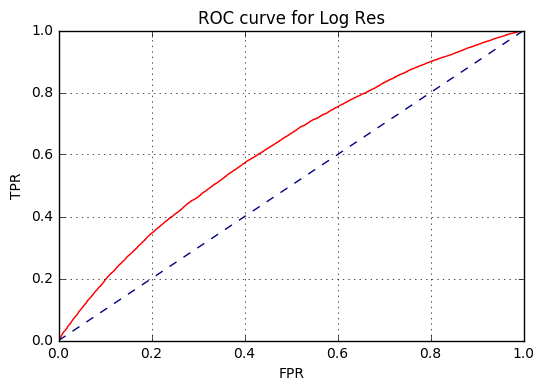

In [397]:
fpr, tpr, threshold = roc_curve(y_test, preds) 
plt.plot(fpr,tpr, color='r', label='Log Res') 
plt.title('ROC curve for Log Res') 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlabel('FPR') 
plt.ylabel('TPR') 
plt.grid()

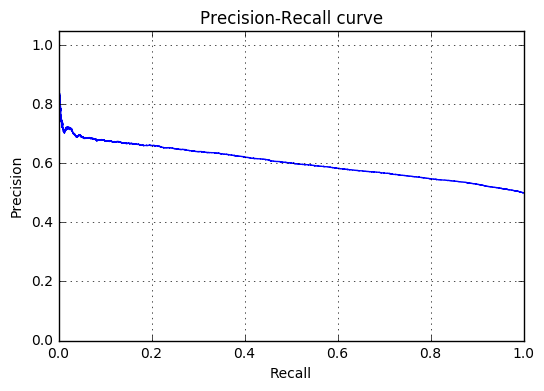

In [398]:
precision, recall, _ = precision_recall_curve(y_test, preds)
plt.step(recall, precision)   
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.ylim([0.0, 1.05]) 
plt.xlim([0.0, 1.0]) 
plt.grid()
plt.title('Precision-Recall curve')

Предположим, что наш алгоритм должен обеспечивать полноту не менее 0.7. Какому порогу бинаризации вероятностей это будет соответствовать? Какую точность (precision) мы получим? Постройте матрицу ошибок для данного порога. Что вы можете сказать о таком алгоритме? (В свободной форме)

In [414]:
thr = threshold[np.where(recall>=0.7)[0][-1]]
print('Threshold: ', thr)
prec = precision[np.where(recall>=0.7)[0][-1]]
print('Precision: ', prec)
conf = confusion_matrix(y_test, preds>thr)
print('Confusion matrix: \n', conf)

Threshold:  0.477979504043
Precision:  0.567107842343
Confusion matrix: 
 [[14310 35684]
 [ 7873 42133]]


Обеспечивая большую полноту, мы теряем в точности. То есть уменьшаем количество FN и увеличиваем количество FP.

__Задание 3.__ Изучение влияния регуляризатора на процесс обучения

__(0.5 балла)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, запускайте процесс обучения логистической регрессии с параметром $max\_iter=1$ и $w^{(0)}$, полученным на предыдущей итерации. Постройте два графика: на одном из них логистическая регрессия с коэффициентом регуляризации, равным 0, а на другом с некоторым разумным значением. На каждом графике одновременно должна быть и функция потерь для обучающей, и для тестовой выборки. Не забудьте сделать одинаковыми оси обоих графиков. Какие выводы вы можете сделать?

In [ ]:
# Your code here
# ...

## Часть 3. Метод опорных векторов и калибровка вероятностней

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов (в этот раз воспользуйтесь готовой реализацией LinearSVC из sklearn). Используйте уже загруженные и обработанные в предыдущей части данные.

In [363]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=0.1)
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
y_score = svm.decision_function(X_test) 

На той же тестовой части посчитайте все те же метрики. Что вы можете сказать о полученных результатах?

ROC-AUC:  0.587754929664


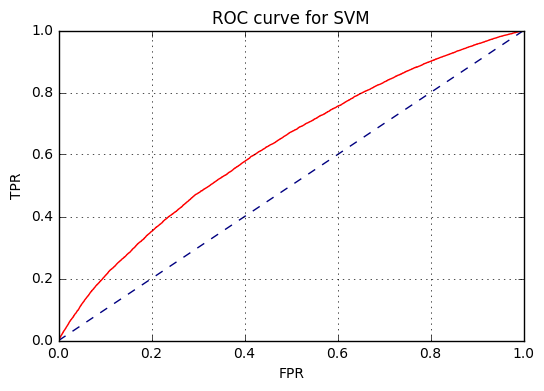

In [251]:
fpr, tpr, _ = roc_curve(y_test, y_score) 
plt.plot(fpr,tpr, color='r', label='SVM') 
plt.title('ROC curve for SVM') 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlabel('FPR') 
plt.ylabel('TPR') 
plt.grid()

roc = roc_auc_score(y_test, preds)
print("ROC-AUC: ", roc)

PR-AUC:  0.684516291881


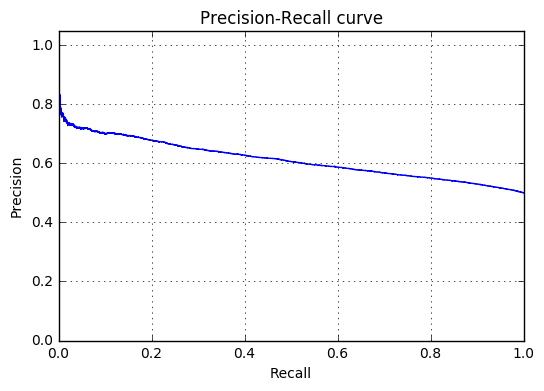

In [257]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision)  
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.ylim([0.0, 1.05]) 
plt.xlim([0.0, 1.0]) 
plt.grid()
plt.title('Precision-Recall curve')
pr = average_precision_score(y_test, preds)
print("PR-AUC: ", pr)

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов с линейным ядром. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром, так как только в нём есть информация об опорных векторах.

In [266]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=241)

//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


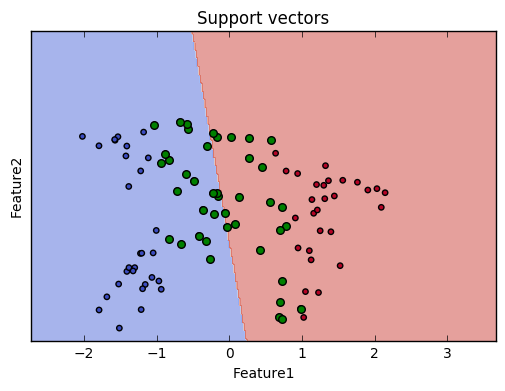

In [283]:
from sklearn.svm import SVC
svm = SVC(C=0.1, kernel='linear')
svm.fit(X, y)

def meshgrid(x, y, h=.02): 
    x_min, x_max = x.min() - 1, x.max() + 1 
    y_min, y_max = y.min() - 1, y.max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    return xx, yy 
 
xx, yy = meshgrid(X0, X1) 
plot_contours(svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=15, edgecolors='k') 
plt.xlim(xx.min(), xx.max()) 
plt.ylim(yy.min(), yy.max()) 
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.yticks(()) 
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='g', s=30, marker='o')
plt.title('Support vectors') 
plt.legend()

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [421]:
def plot_calibration_curve(y_test, preds, label):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append(l + (l - r) / 2)
        flag, ans = np.unique([y_test[(preds >= l) & (preds < r)] == 1][0], return_counts=True)
        if len(ans) == 2:
            bin_real_ratios.append(ans[1] / (ans[0]+ans[1]))
        elif flag == True:
            bin_real_ratios.append(1)
        else:
            bin_real_ratios.append(0)
    plt.plot(bin_middle_points, bin_real_ratios, label=label)

Посмотройте калибровочные кривые для логистической регрессии и метода опорных векторов (на той же самой выборке с тем же самым разбиением — можно использовать уже полученные ранее предсказания). Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [293]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_score = svm.decision_function(X_test)

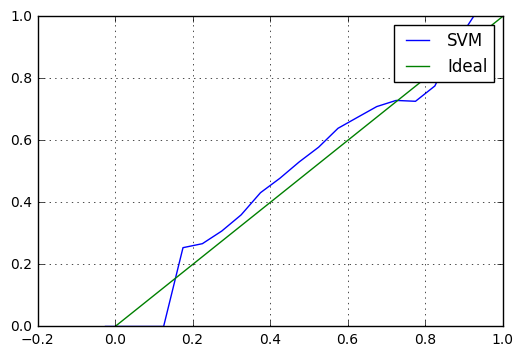

In [424]:
plot_calibration_curve(y_test, y_score, 'SVM')
x = np.linspace(0,1,num=100)
plt.plot(x, x, label='Ideal')
plt.grid()
plt.legend()

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

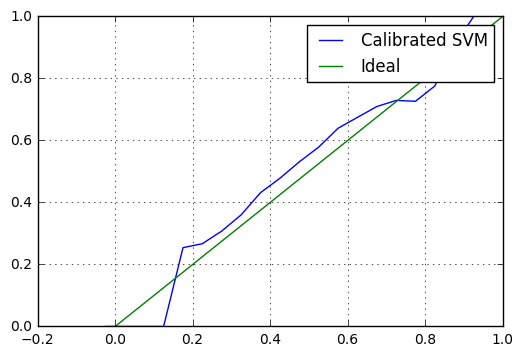

In [423]:
from sklearn.calibration import CalibratedClassifierCV
calbr=CalibratedClassifierCV()
calbr.fit(X_train, y_train)
y_score = calbr.predict_proba(X_test)[:,1]
plot_calibration_curve(y_test, y_score, 'Calibrated SVM')
plt.plot(x, x, label='Ideal')
plt.grid()
plt.legend()

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [ ]:
# Your code here
# ...

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было ранее). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 2.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

__(1 балл)__

In [ ]:
# Your code here
# ...

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
- вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени)
- вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации)
- внесение некоторого шума в посчитанные признаки. 

__Задание 3.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(0.25 балла)__

__(Бонусная часть)__ Посчитайте корректные счётчики одним из двух способов описанных выше (не забудьте добавить и шум). 

In [ ]:
# Your code here
# ...

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1] + C * global\_mean}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 4.__ Добавьте сглаживание, описанное выше и повторите эксперименты.

__(0.75 балла)__

In [ ]:
# Your code here
# ...

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

__Ответ:__ ...

**Задание 5.** Какой лучший мем в 2k17?

__Ответ:__ ...


**Задание 6.** Поделитесь лучшим стикерпаком. Только там не должно быть преподавателей и ассистентов этого курса.

__Ответ:__ ...

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 1.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__
- несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.

In [ ]:
# Your code here
# ...